Primer empleo

In [1]:

import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#from tabulate import tabulate
#from sodapy import Socrata
from xlsxwriter import Workbook

plt.figure(figsize=(15,30))
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

path=r'Datos.xlsx'

font1 = {'family':'Comic Sans MS','size':20}
font2 = {'family':'Comic Sans MS','size':15}

# Cargue y lectura de los datos

In [2]:
data = pd.read_csv('empleo.csv')

# Encabezado de datos

In [3]:
data.head()

,Tipo Documento,Canal de Registro,Edad,Género,Nivel de Estudio,Título Homologado,Ciudad de Residencia,Fecha Registro,Programa de Gobierno,Condiciones Especiales,Situación Laboral,Fecha Actualización,Zona,Mes,Año,Punto Atención,Rango Edad
0,Cédula de Ciudadanía,Agencia,39,F,Media(10-13),BACHILLER ACADÉMICO,BARRANQUILLA,03/01/2020 02:22:50 p.m.,NaN,NaN,Desempleado,03/01/2020 02:22:50 p.m.,Urbano,1,"2,020",Barrios Modelo,29 - 39
1,Cédula de Ciudadanía,Agencia,40,F,Universitaria,ENFERMERA,BARRANQUILLA,07/01/2020 08:29:56 a.m.,NaN,NaN,Desempleado,07/01/2020 08:29:56 a.m.,Urbano,1,"2,020",Barrios Modelo,40 - 50
2,Cédula de Ciudadanía,Agencia,24,M,Técnica Profesional,OPERACIÓN DE PROCESOS INDUSTRIALES,BARRANQUILLA,07/01/2020 10:23:32 a.m.,NaN,NaN,Primer Empleo,07/01/2020 10:23:32 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
3,Cédula de Ciudadanía,Agencia,22,M,Media(10-13),BACHILLER ACADEMICO,BARRANQUILLA,07/01/2020 11:04:52 a.m.,NaN,NaN,Desempleado,07/01/2020 11:04:52 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
4,Cédula de Ciudadanía,Agencia,23,F,Universitaria,INGENIERA AMBIENTAL,BARRANQUILLA,09/01/2020 09:48:22 a.m.,NaN,NaN,Desempleado,09/01/2020 09:48:22 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28


# ver valores nulos

In [4]:
data.isnull().sum()

Tipo Documento                0
Canal de Registro             0
Edad                          0
Género                        0
Nivel de Estudio            372
Título Homologado           375
Ciudad de Residencia          5
Fecha Registro                0
Programa de Gobierno      16217
Condiciones Especiales    16558
Situación Laboral             5
Fecha Actualización           0
Zona                        363
Mes                           0
Año                           0
Punto Atención                0
Rango Edad                    0
dtype: int64

# Encontrar quienes estan en primer empleo en la base de datos


In [5]:
data['Situación Laboral']=='Primer Empleo'

0        False
1        False
2         True
3        False
4        False
         ...  
17215     True
17216    False
17217    False
17218    False
17219    False
Name: Situación Laboral, Length: 17220, dtype: bool

# verificando la informacion

In [6]:
data[data['Situación Laboral']=='Primer Empleo']

,Tipo Documento,Canal de Registro,Edad,Género,Nivel de Estudio,Título Homologado,Ciudad de Residencia,Fecha Registro,Programa de Gobierno,Condiciones Especiales,Situación Laboral,Fecha Actualización,Zona,Mes,Año,Punto Atención,Rango Edad
2,Cédula de Ciudadanía,Agencia,24,M,Técnica Profesional,OPERACIÓN DE PROCESOS INDUSTRIALES,BARRANQUILLA,07/01/2020 10:23:32 a.m.,NaN,NaN,Primer Empleo,07/01/2020 10:23:32 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
13,Cédula de Ciudadanía,Agencia,17,M,Técnica Laboral,tecnico laborar por competencias auxiliar de g...,BARRANQUILLA,08/01/2020 10:58:00 a.m.,NaN,NaN,Primer Empleo,08/01/2020 10:58:00 a.m.,Urbano,1,"2,020",Barrios Modelo,MENOR DE EDAD
27,Cédula de Ciudadanía,Autoregistro,21,F,Media(10-13),Media,SOLEDAD,15/01/2020 07:47:12 p.m.,NaN,NaN,Primer Empleo,15/01/2020 07:47:12 p.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
33,Cédula de Ciudadanía,Autoregistro,23,M,Universitaria,Psicólogo,BARRANQUILLA,17/01/2020 06:15:41 p.m.,NaN,NaN,Primer Empleo,17/01/2020 06:15:41 p.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
40,Cédula de Ciudadanía,Agencia,23,F,Media(10-13),BACHILLER ACADEMICO,BARRANQUILLA,22/01/2020 02:48:08 p.m.,NaN,NaN,Primer Empleo,22/01/2020 02:48:08 p.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17148,Cédula de Ciudadanía,Autoregistro,28,F,Tecnológica,TECNOLOGO EN ANÁLISIS Y DESARROLLO DE SISTEMAS...,BARRANQUILLA,23/12/2021 08:12:40 p.m.,NaN,NaN,Primer Empleo,23/12/2021 08:12:40 p.m.,Rural,12,"2,021",Barrio Altos de Riomar,18 - 28
17171,Cédula de Ciudadanía,Autoregistro,18,F,Técnica Laboral,Técnico en Auxiliar Administrativo,BARRANQUILLA,27/12/2021 02:58:47 p.m.,NaN,NaN,Primer Empleo,27/12/2021 02:58:47 p.m.,Urbano,12,"2,021",Bario 7 de abril,18 - 28
17176,Cédula de Ciudadanía,Autoregistro,22,F,NaN,NaN,BARRANQUILLA,27/12/2021 09:29:39 p.m.,NaN,NaN,Primer Empleo,27/12/2021 09:29:39 p.m.,Urbano,12,"2,021",Barrio Altos de Riomar,18 - 28
17193,Cédula de Ciudadanía,Autoregistro,22,F,Universitaria,Fisioterapeuta,BARRANQUILLA,29/12/2021 08:24:46 a.m.,NaN,NaN,Primer Empleo,29/12/2021 08:24:46 a.m.,Urbano,12,"2,021",Barrio Simón Bolívar,18 - 28


# Creando nuevo dataframe

In [7]:
newdata=data.copy

#Guardando datos filtrados en el nuevo dataframe 

In [8]:
ndata=data[data['Situación Laboral']=='Primer Empleo']

Renombrar encabezados

In [9]:
mdatos =ndata.rename (columns={
    "Tipo Documento" :"Tipo_Documento",
    "Canal de Registro":"Canal_Registro",
    "Edad":"Edad",
    'Género': 'Genero',
    "Nivel de Estudio": "Nivel_Estudio",
    'Título Homologado' :'Titulo_Homologado',
    'Ciudad de Residencia':'Ciudad_Residencia',
    'Fecha Registro':'Fecha_Registro',
    'Programa de Gobierno':'Programa_Gobierno',
    'Condiciones Especiales':'Condiciones_Especiales',
    'Situación Laboral':'Situación_Laboral',
    'Fecha Actualización':'Fecha_Actualizacion',
    'Zona':'Zona',
    'Mes':'Mes',
    'Año':"anio",
    'Punto Atención':'Punto_Atencion',
    'Rango Edad':'Rango_Edad'
})
mdatos.columns

Index(['Tipo_Documento', 'Canal_Registro', 'Edad', 'Genero', 'Nivel_Estudio',
       'Titulo_Homologado', 'Ciudad_Residencia', 'Fecha_Registro',
       'Programa_Gobierno', 'Condiciones_Especiales', 'Situación_Laboral',
       'Fecha_Actualizacion', 'Zona', 'Mes', 'anio', 'Punto_Atencion',
       'Rango_Edad'],
      dtype='object')

# creacion de dataframe para cada año de pandemia 

In [10]:
anio2021=mdatos[mdatos['anio']=="2,021"]
anio2020=mdatos[mdatos['anio']=="2,020"]


Guardar en xlsx

In [11]:
'''writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
ndata.to_excel(writer, sheet_name = 'Dframe')
writer.save()
writer.close()

print(ndata.columns)'''

"writer = pd.ExcelWriter(path, engine = 'xlsxwriter')\nndata.to_excel(writer, sheet_name = 'Dframe')\nwriter.save()\nwriter.close()\n\nprint(ndata.columns)"

En la grafica anterior podemos apreciar que el numero de mujeres atendidas y consuguieron empleo estos dos ultimos años fue mayor al numero de hombres  .

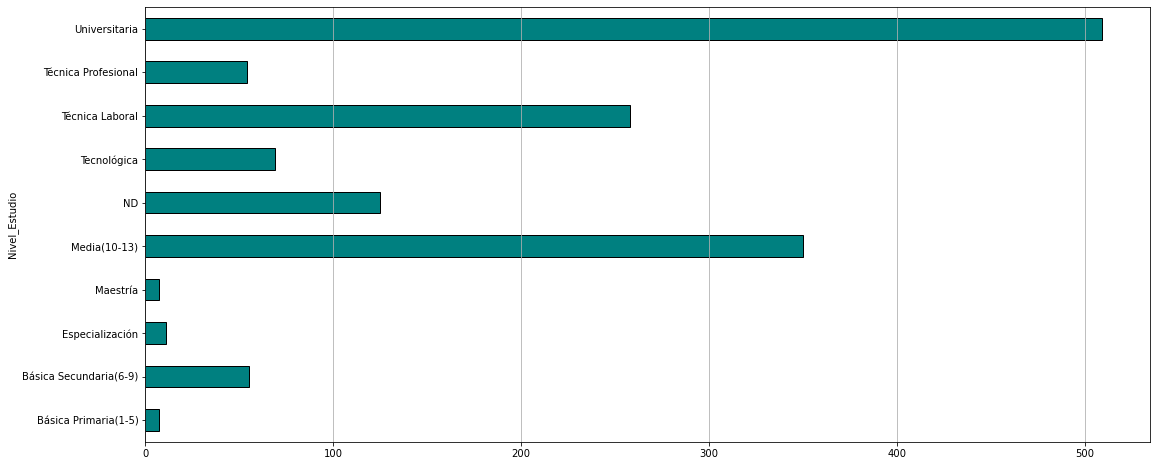

In [12]:
valor_porcarrera = mdatos.groupby("Nivel_Estudio")["Tipo_Documento"].count()
valor_porcarrera.head(20).plot.barh(edgecolor='black',figsize=(18,8),color="teal")
plt.grid(axis="x")
plt.show()

Grafico de personas empleadass organizadass por su nivel de estudios , se encuntra agrupada con la informacion de estos dos ultimos años de pandemia (2020 - 2021)

# Grafica de porcentaje por Genero

<function matplotlib.pyplot.show(close=None, block=None)>

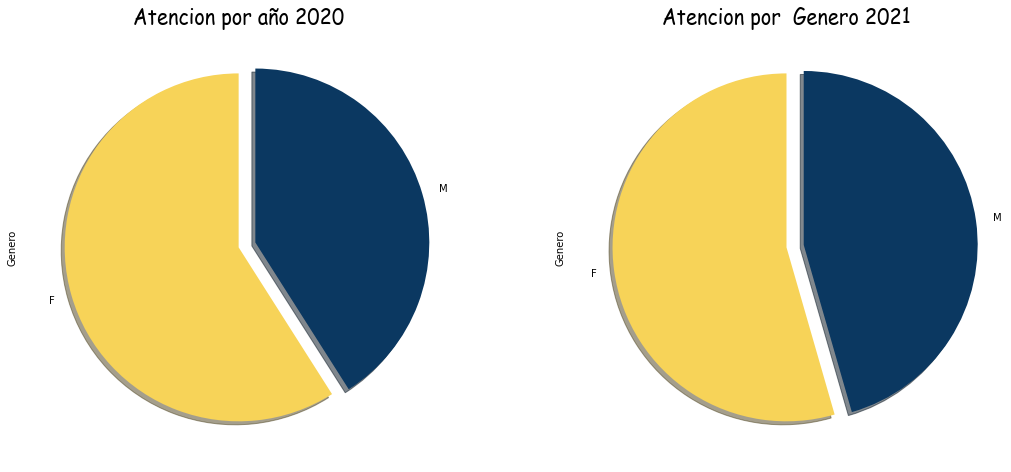

In [13]:
colors = ['#F7D358','#0B3861']
colors1=['#53A9A3','#97367A']
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(18,8))
anio2020['Genero'].value_counts().plot.pie(ax =ax1,explode =[0,0.1],  shadow =True,startangle=90,colors=colors)
ax1.set_title('Atencion por año 2020',fontdict= font1)
plt.show
anio2021['Genero'].value_counts().plot.pie(ax =ax2,explode =[0,0.1], shadow =True,startangle=90,colors=colors)
ax2.set_title('Atencion por  Genero 2021',fontdict= font1)
plt.show

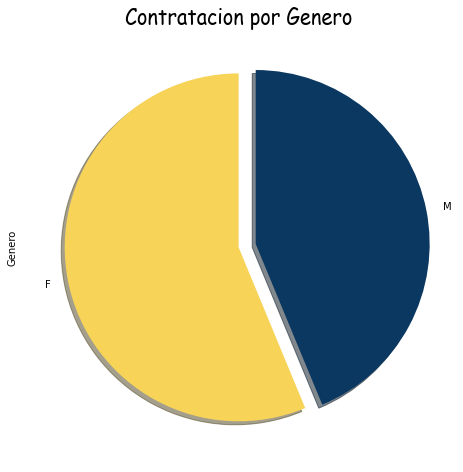

In [14]:
mdatos.Genero.value_counts().plot.pie(explode =[0,0.1] , shadow =True,startangle=90,  figsize =(18,8), colors=colors)
plt.title('Contratacion por Genero',fontdict= font1)
plt.show()


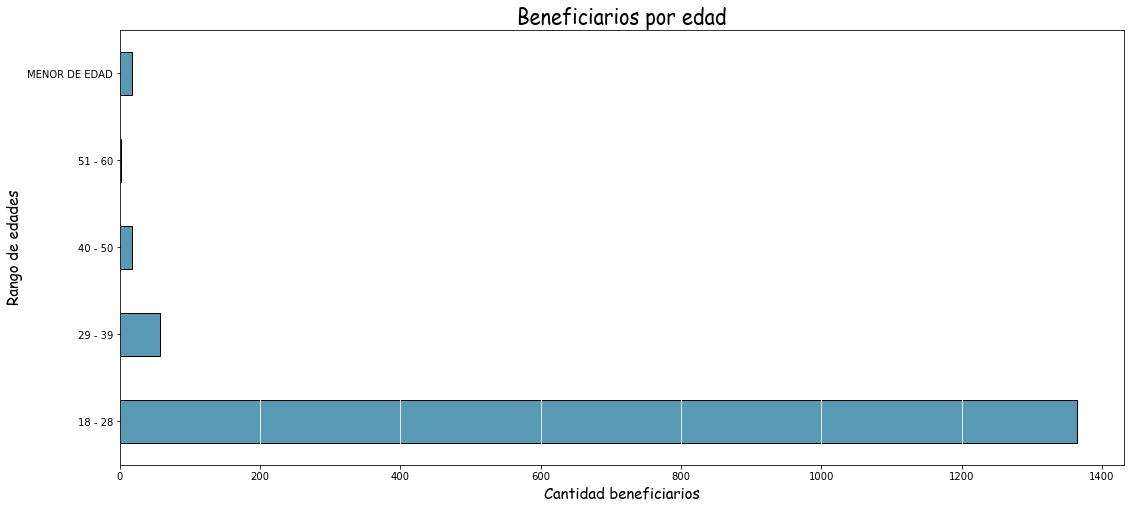

<Figure size 1296x576 with 0 Axes>

'\nf, ax =plt.subplots(1,2 , figsize=(18,8))\n#f, ax =plt.subplots(1,2,figsize=(18,8))\nPrograma = anio2020.groupby("Rango_Edad")["Situación_Laboral"].count()\nPrograma.head(7).plot.barh(edgecolor="black",color="#5999B3",  figsize =(18,8), ax=ax[1])\nax[1].grid(axis="x",color="white")\nax[1].set_title("Beneficiarios por edad",fontdict=font1)\nax[1].set_ylabel("Rango de edades", fontdict= font2)\nax[1].set_xlabel(\'Cantidad beneficiarios\',fontdict=font2)\n\nplt.show()\n'

In [25]:
Programa = mdatos.groupby("Rango_Edad")["Situación_Laboral"].count()
Programa.head(7).plot.barh(edgecolor="black",color="#5999B3",  figsize =(18,8))
plt.grid(axis="x",color="white")
plt.title("Beneficiarios por edad",fontdict=font1)
plt.ylabel("Rango de edades", fontdict= font2)
plt.xlabel('Cantidad beneficiarios',fontdict=font2)
plt.figure( figsize =(18,8))
plt.show()

'''
f, ax =plt.subplots(1,2 , figsize=(18,8))
#f, ax =plt.subplots(1,2,figsize=(18,8))
Programa = anio2020.groupby("Rango_Edad")["Situación_Laboral"].count()
Programa.head(7).plot.barh(edgecolor="black",color="#5999B3",  figsize =(18,8), ax=ax[1])
ax[1].grid(axis="x",color="white")
ax[1].set_title("Beneficiarios por edad",fontdict=font1)
ax[1].set_ylabel("Rango de edades", fontdict= font2)
ax[1].set_xlabel('Cantidad beneficiarios',fontdict=font2)

plt.show()
'''

# Histograma por año 2020 y 2021 sobre personas contratadas durante cada mes de cada año

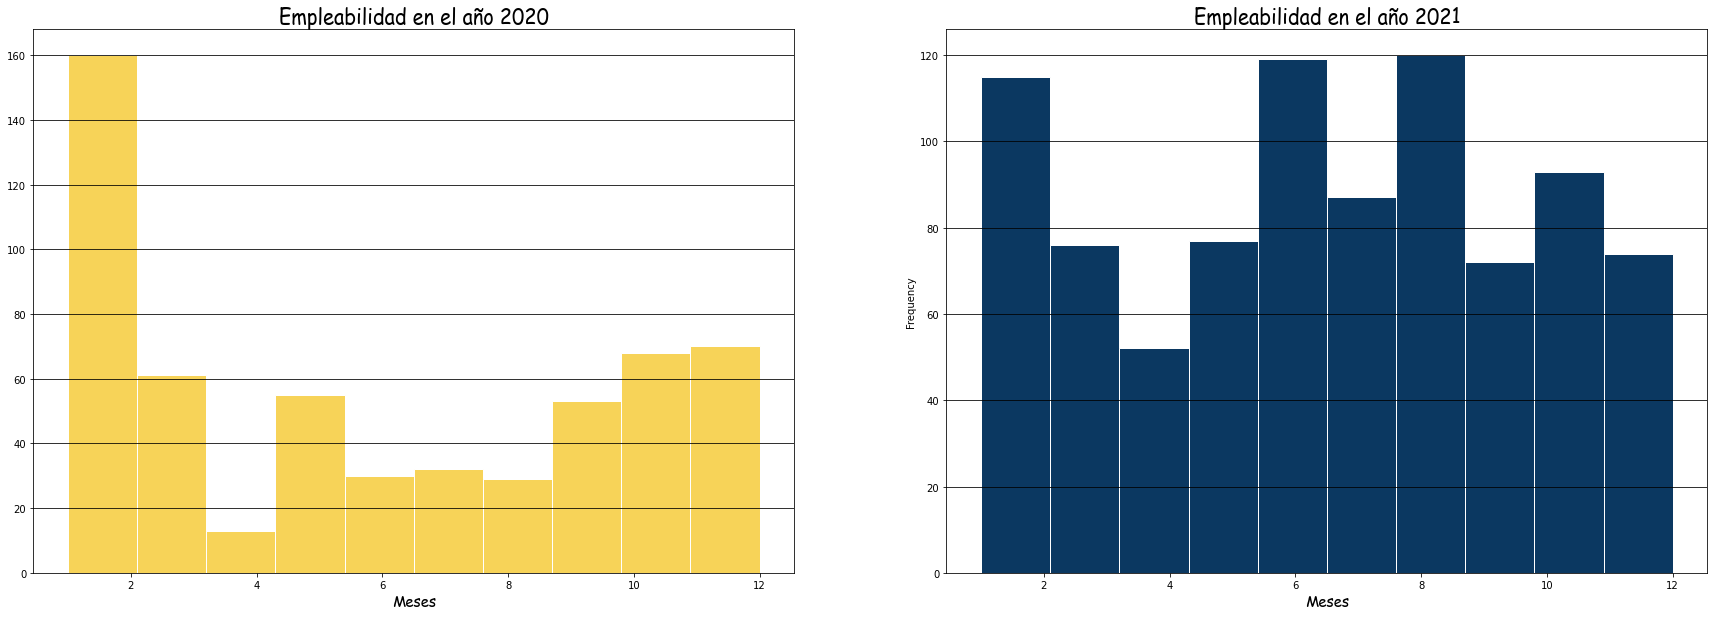

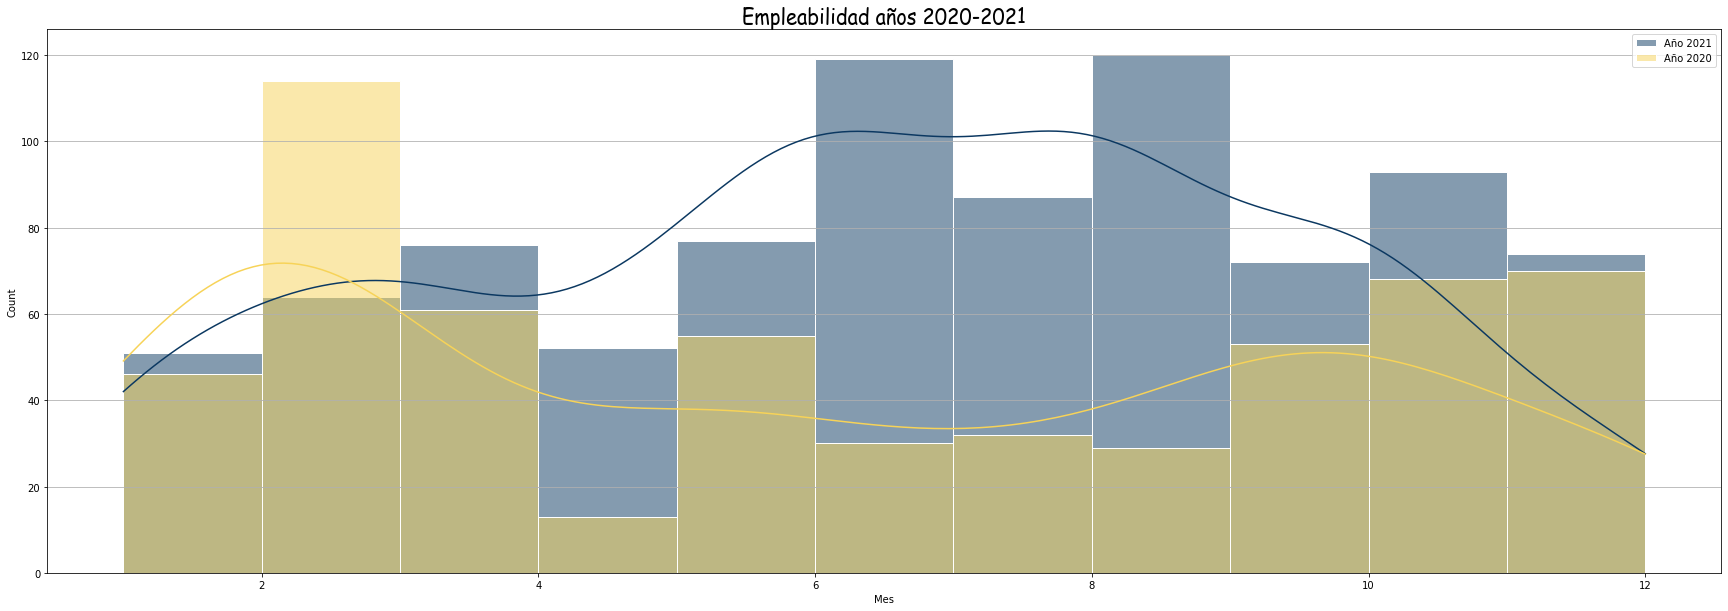

In [28]:
colors = ['#F7D358','#0B3861']
f , ax =plt.subplots(1,2,figsize=(30,10))
anio2020.Mes.plot.hist(edgecolor='white',color='#F7D358',ax=ax[0],)
anio2021.Mes.plot.hist(edgecolor='white',color='#0B3861',ax=ax[1])
ax[0].set_title ('Empleabilidad en el año 2020',fontdict = font1)
ax[0].set_xlabel('Meses', fontdict = font2)
ax[0].set_ylabel('')
ax[0].grid(axis="y", color="black")
ax[1].set_title ('Empleabilidad en el año 2021',fontdict = font1)
ax[1].set_xlabel('Meses', fontdict = font2)
ax[1].grid(axis="y", color="black")
plt.show

plt.figure(figsize=(30,10))
sns.histplot(data=anio2021 , x="Mes" ,color="#0B3861", kde=True, label="Año 2021",edgecolor='white')
sns.histplot(data=anio2020 , x="Mes",color="#F7D358", kde=True, label="Año 2020",edgecolor='white')
plt.title("Empleabilidad años 2020-2021", font=font1)
plt.legend() 
plt.grid(axis="y")
plt.show()

In [17]:
"""plt.figure(figsize=(10,5))
plt.bar(anio2021.Rango_Edad  ,anio2021.Edad)
plt.title('Rango de edad')
ax = plt.subplot()  # Axis
ax.set_xlabel('Género')
ax.set_ylabel('Poblacion')
plt.show()"""

"plt.figure(figsize=(10,5))\nplt.bar(anio2021.Rango_Edad  ,anio2021.Edad)\nplt.title('Rango de edad')\nax = plt.subplot()  # Axis\nax.set_xlabel('Género')\nax.set_ylabel('Poblacion')\nplt.show()"

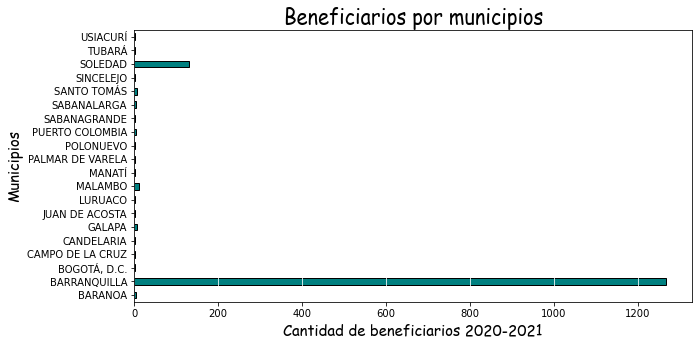

<Figure size 1296x576 with 0 Axes>

In [27]:
plt.figure(figsize=(10,5))
valor_por_ciudad = mdatos.groupby("Ciudad_Residencia")["Situación_Laboral"].count()
valor_por_ciudad.head(20).plot.barh(edgecolor="black",color="teal")
plt.title("Beneficiarios por municipios",fontdict=font1)
plt.grid(axis="x", color="white")
plt.ylabel("Municipios", fontdict= font2)
plt.xlabel('Cantidad de beneficiarios 2020-2021',fontdict=font2)
plt.figure( figsize =(18,8))
plt.show()


In [19]:
NB1=mdatos[mdatos['Ciudad_Residencia']!="BARRANQUILLA"]

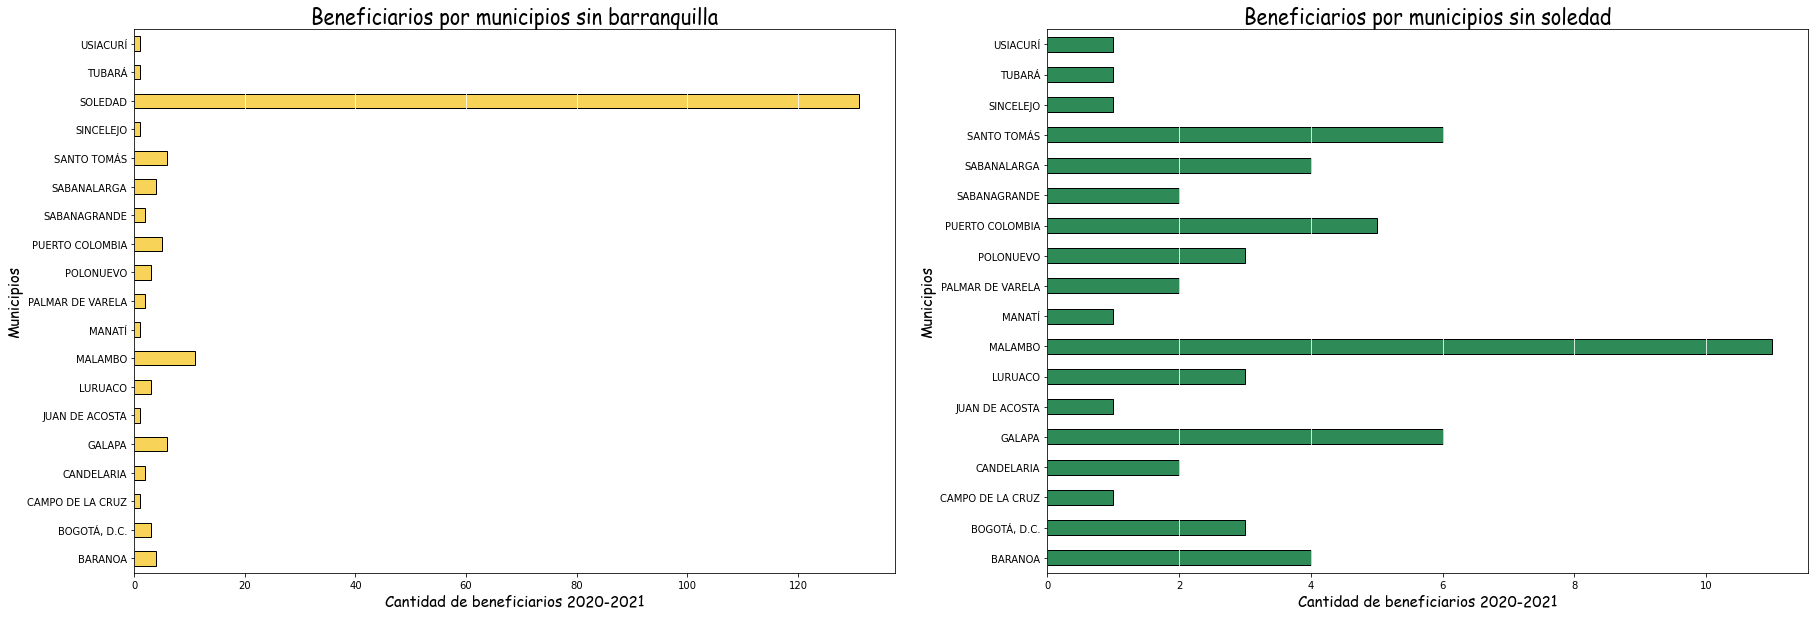

In [20]:
NB2=NB1[mdatos['Ciudad_Residencia']!="SOLEDAD"]
f , ax =plt.subplots(1,2,figsize=(30,10))
valor_por_ciudad = NB1.groupby("Ciudad_Residencia")["Situación_Laboral"].count()
valor_por_ciudad.head(20).plot.barh(edgecolor="black",color="#F7D358",ax=ax[0])
ax[0].set_title("Beneficiarios por municipios sin barranquilla",fontdict=font1)
ax[0].set_ylabel("Municipios", fontdict= font2)
ax[0].set_xlabel('Cantidad de beneficiarios 2020-2021',fontdict=font2)
ax[0].grid(axis="x", color="white")

valor_por_ciudad2 = NB2.groupby("Ciudad_Residencia")["Situación_Laboral"].count()
valor_por_ciudad2.head(20).plot.barh(edgecolor="black",color="seagreen",ax=ax[1])
ax[1].set_title("Beneficiarios por municipios sin soledad",fontdict=font1)
ax[1].set_ylabel("Municipios", fontdict= font2)
ax[1].grid(axis="x", color="white")

plt.xlabel('Cantidad de beneficiarios 2020-2021',fontdict=font2)
plt.show()

In [21]:
mdatos.groupby(["anio","Mes","Ciudad_Residencia"])["Situación_Laboral"].count()

anio   Mes  Ciudad_Residencia
2,020  1    BARANOA               1
            BARRANQUILLA         40
            POLONUEVO             1
            PUERTO COLOMBIA       1
            SOLEDAD               3
                                 ..
2,021  11   LURUACO               1
            SOLEDAD               5
       12   BARRANQUILLA         28
            GALAPA                1
            SOLEDAD               3
Name: Situación_Laboral, Length: 97, dtype: int64

In [22]:
#print(tabulate(anio2020, headers='keys', tablefmt='fancy_grid',))